<h1 style='background-color:#7FADC4 ; font-family:newtimeroman; font-size:200%; text-align:center; border-radius: 15px 50px;' > Water Quality Classification using Feyn    </h1>
<img src="https://www.sgs.nl/-/media/global/images/structural-website-images/hero-images/hero-water-sample-860px.jpg" width="800px">

## Description


1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.


### Dataset Link 
#### [Here](https://www.kaggle.com/adityakadiwal/water-potability)

In [1]:
!pip install feyn

     |████████████████████████████████| 311 kB 6.6 MB/s 
     |████████████████████████████████| 66 kB 4.0 MB/s 


In [2]:
pip install autoviz 

     |████████████████████████████████| 44 kB 1.4 MB/s 
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xlrd

     |████████████████████████████████| 96 kB 2.6 MB/s 
Note: you may need to restart the kernel to use updated packages.


## Imports Lab

In [4]:
import feyn
import pandas as pd
import seaborn as sns
import sklearn.model_selection

## Read the data

In [5]:
df = pd.read_csv('../input/water-potability/water_potability.csv')
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

## Check for missing values

In [8]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

## Drop the miss value (nan)

In [9]:
df= df.dropna()

In [10]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## Auto viz 

Imported AutoViz_Class version: 0.0.83. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.
Shape of your Data Set loaded: (2011, 10)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  9
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0


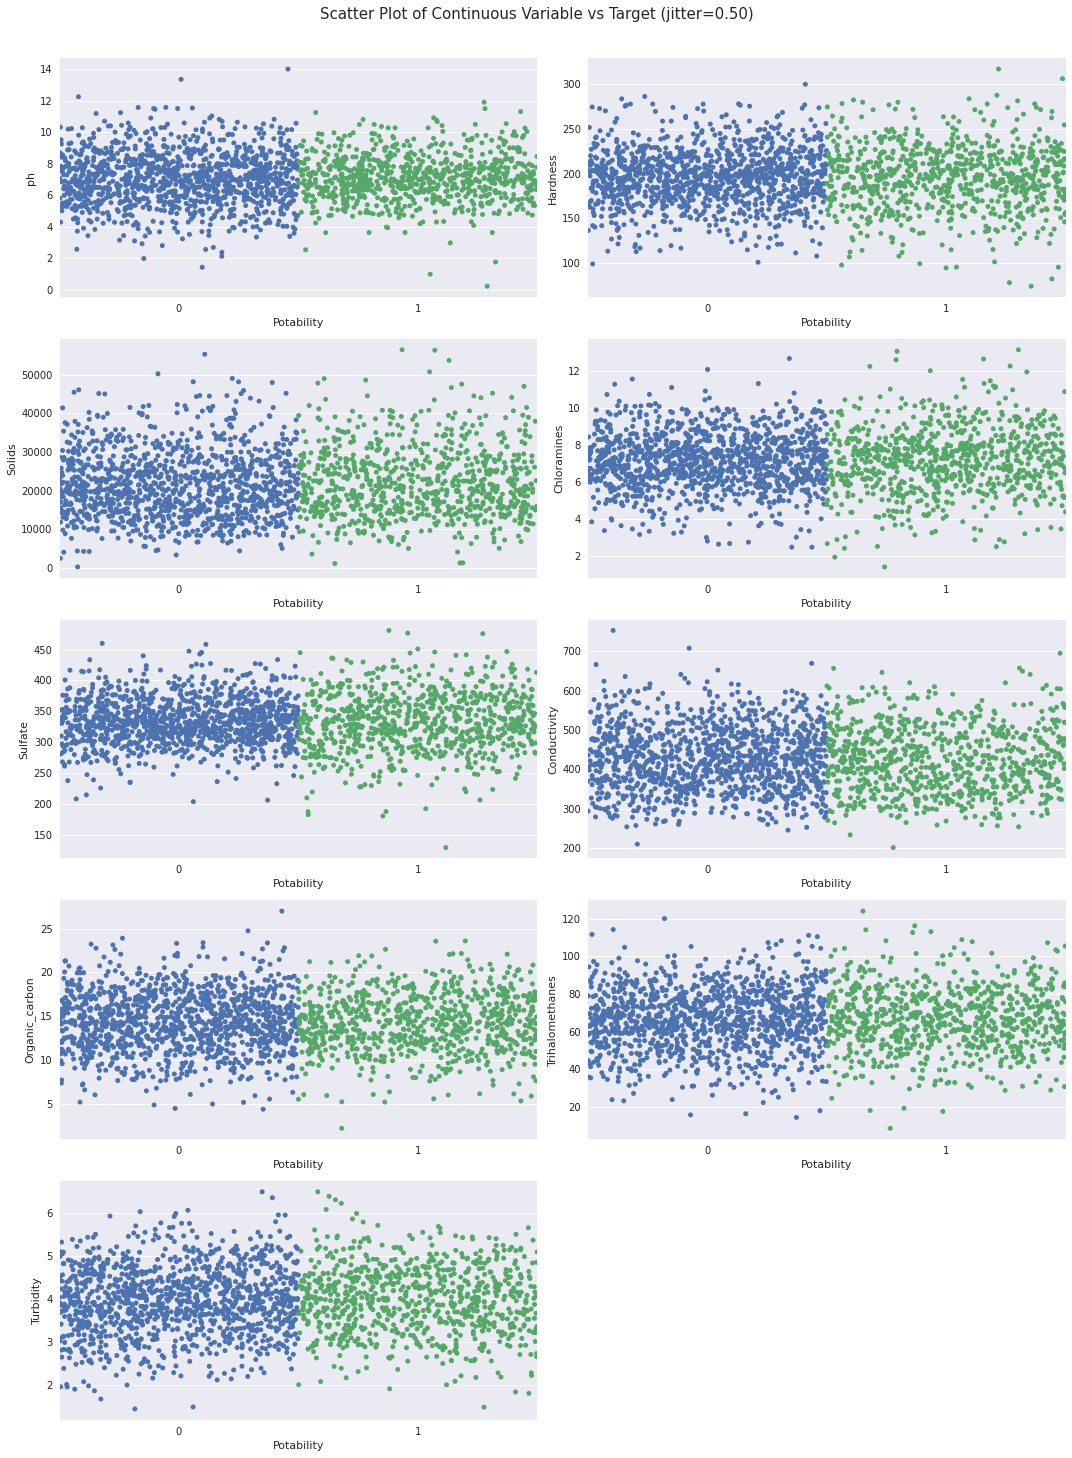

Total Number of Scatter Plots = 45


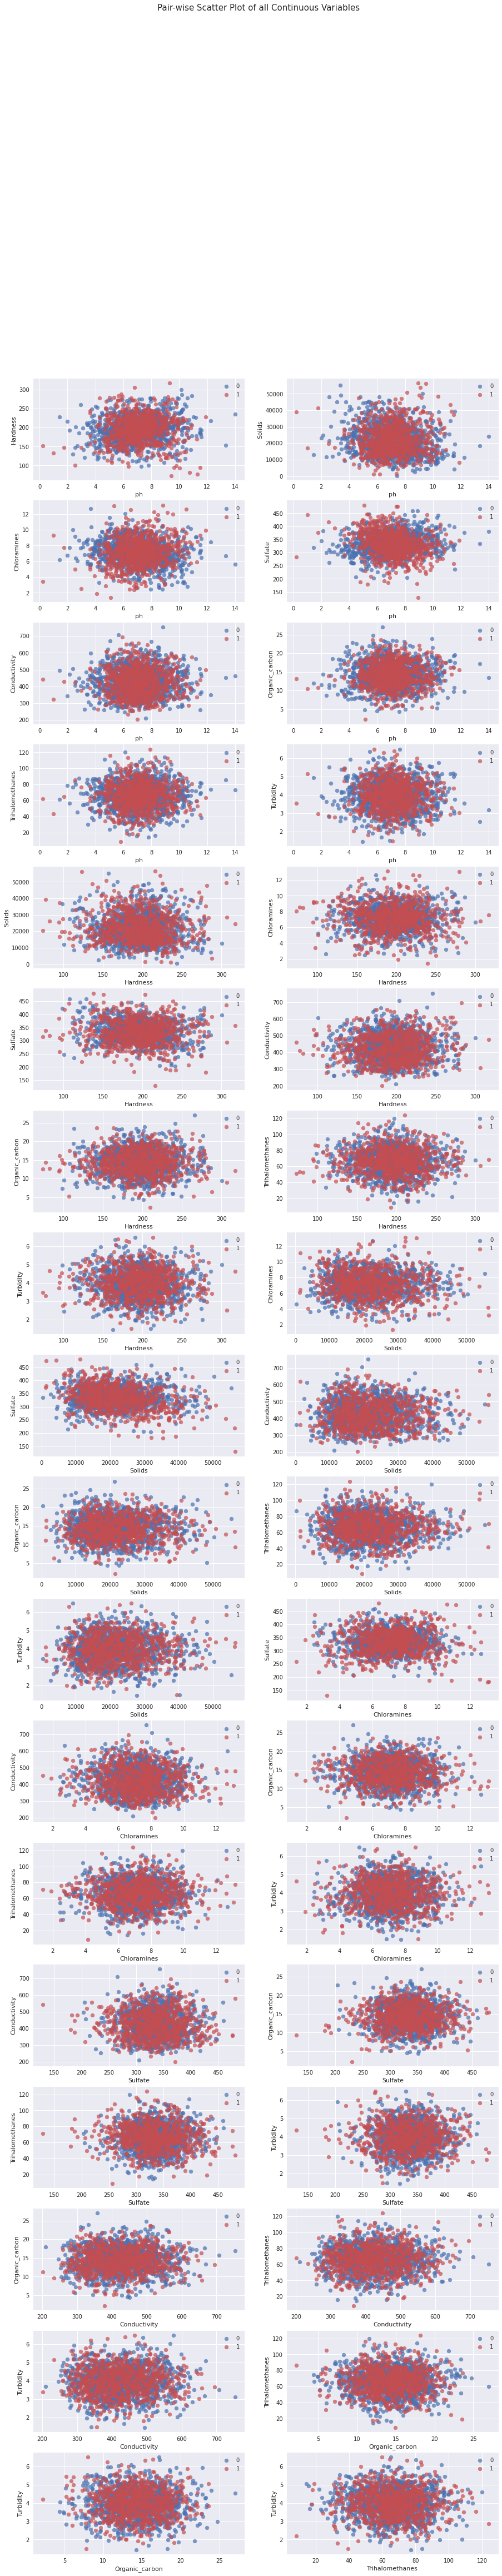

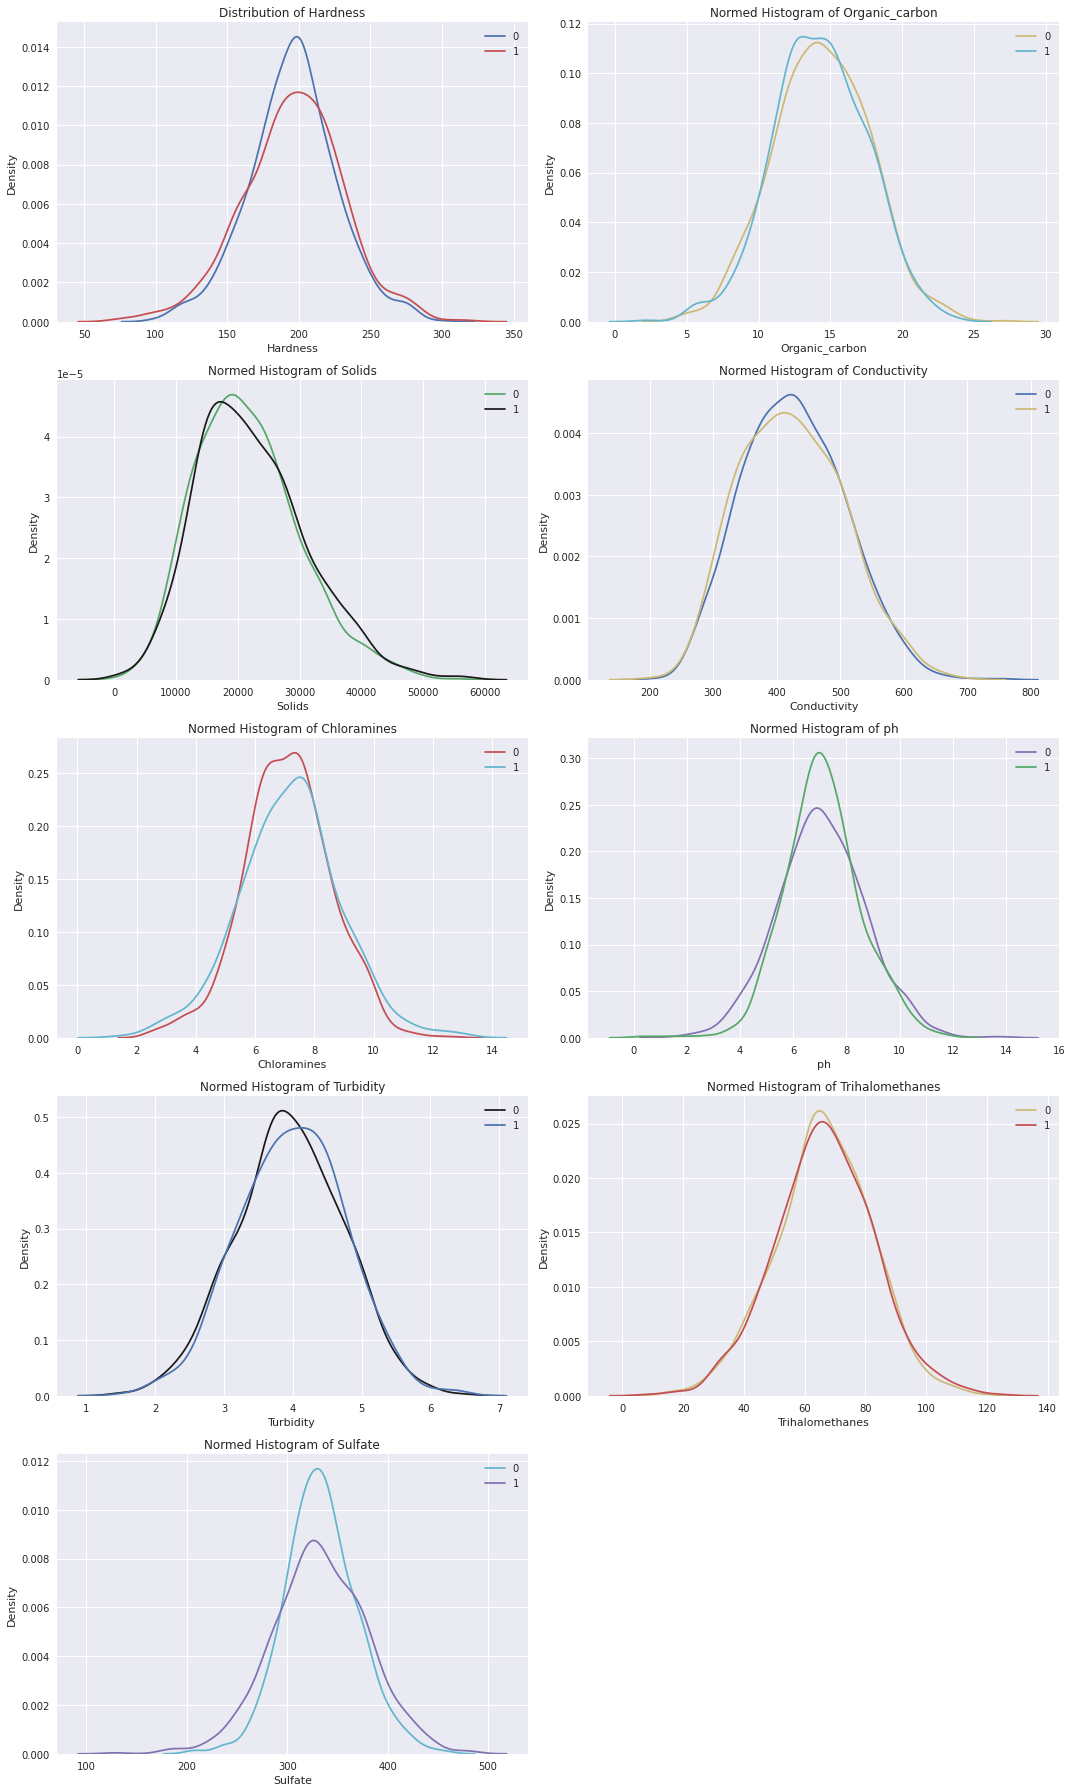

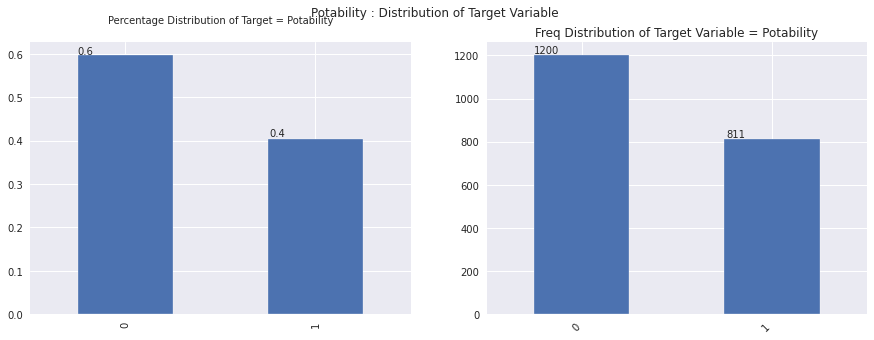

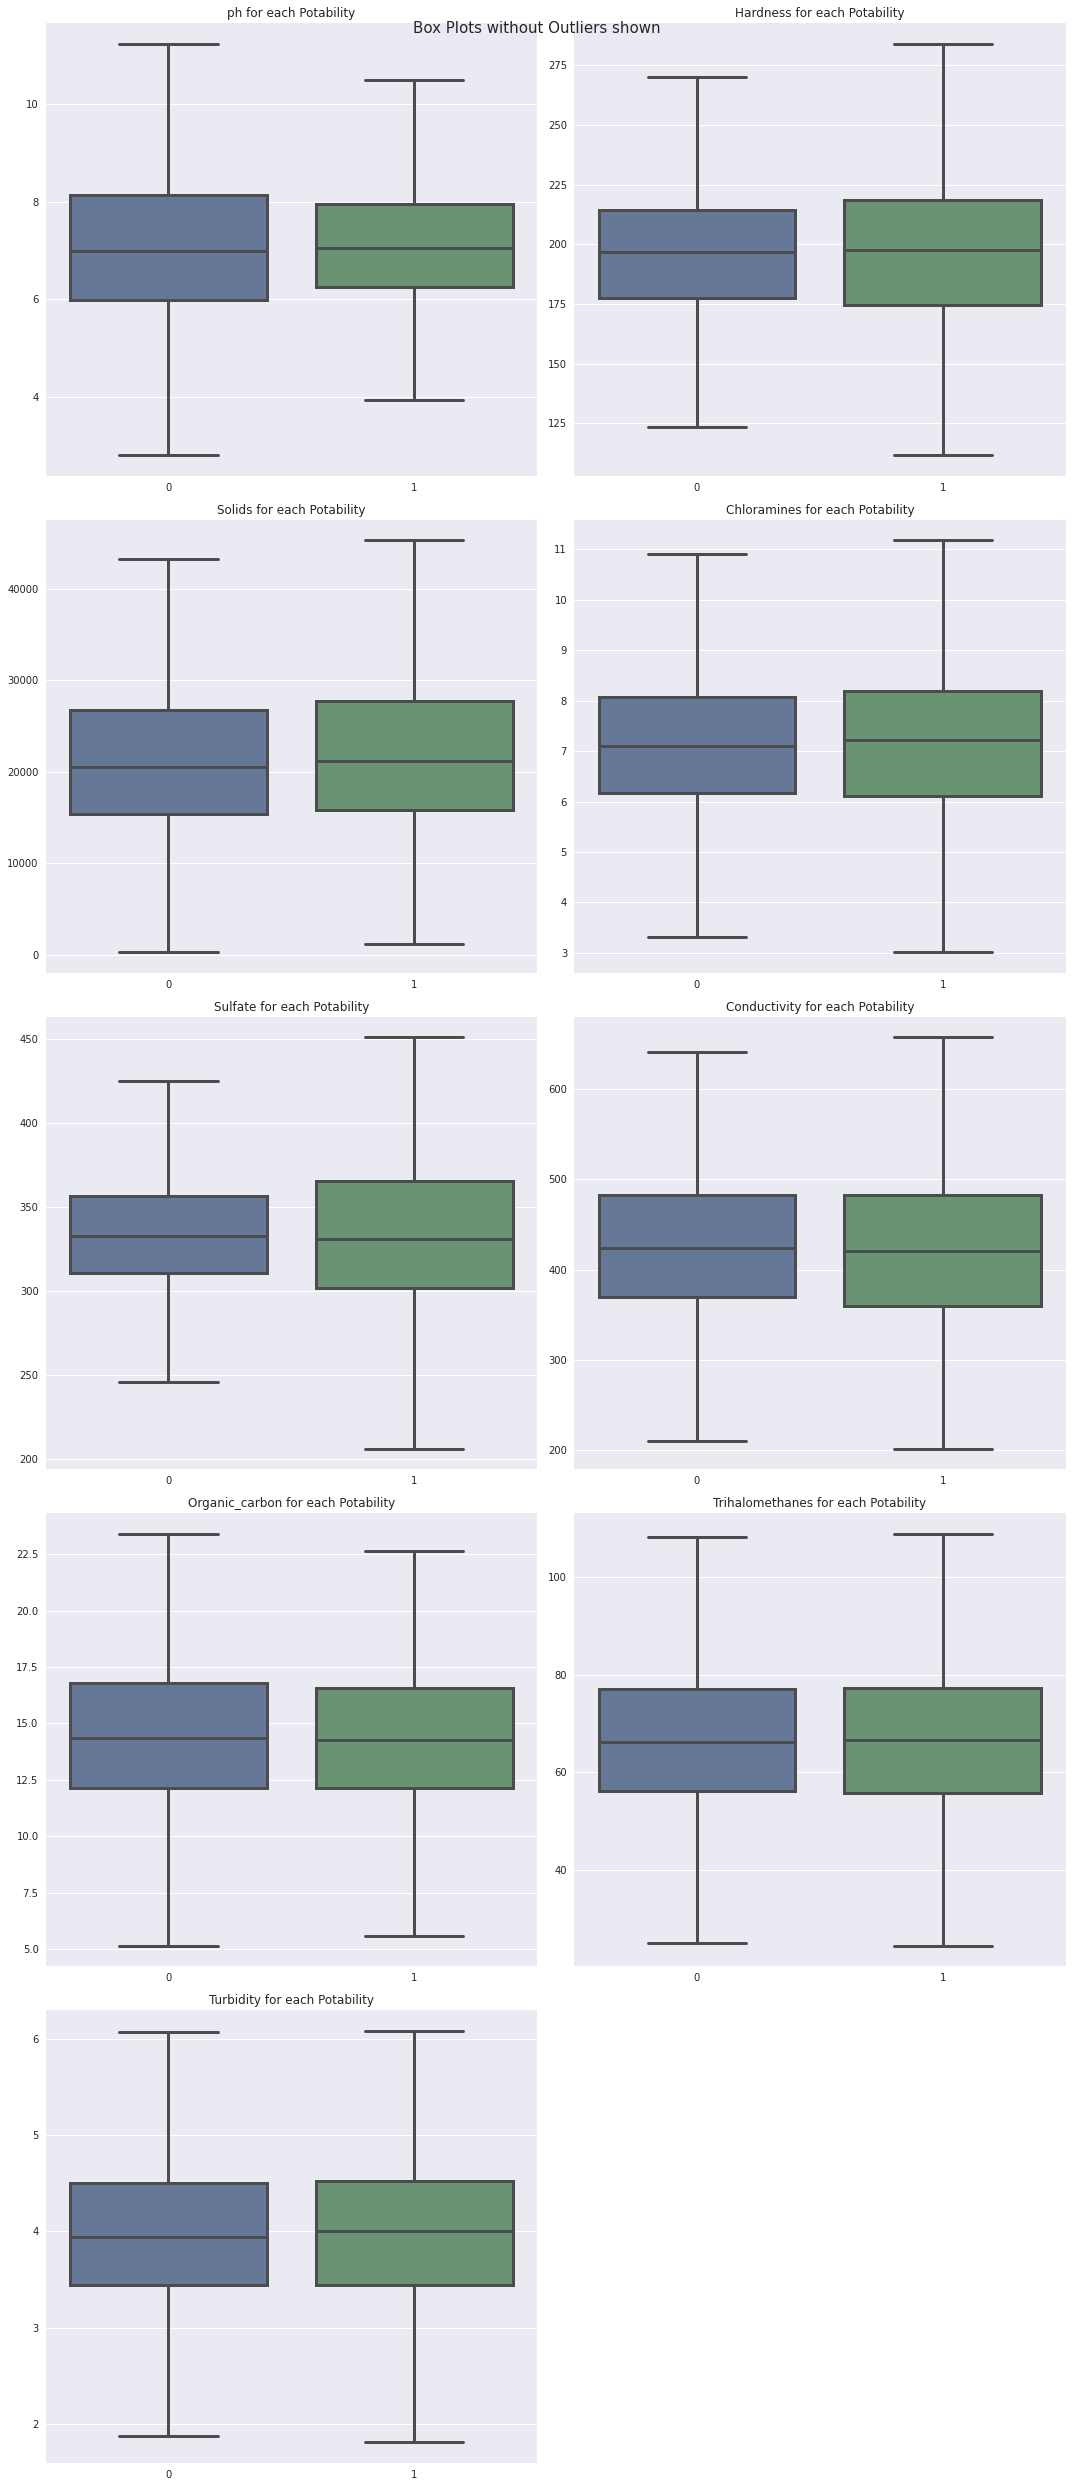

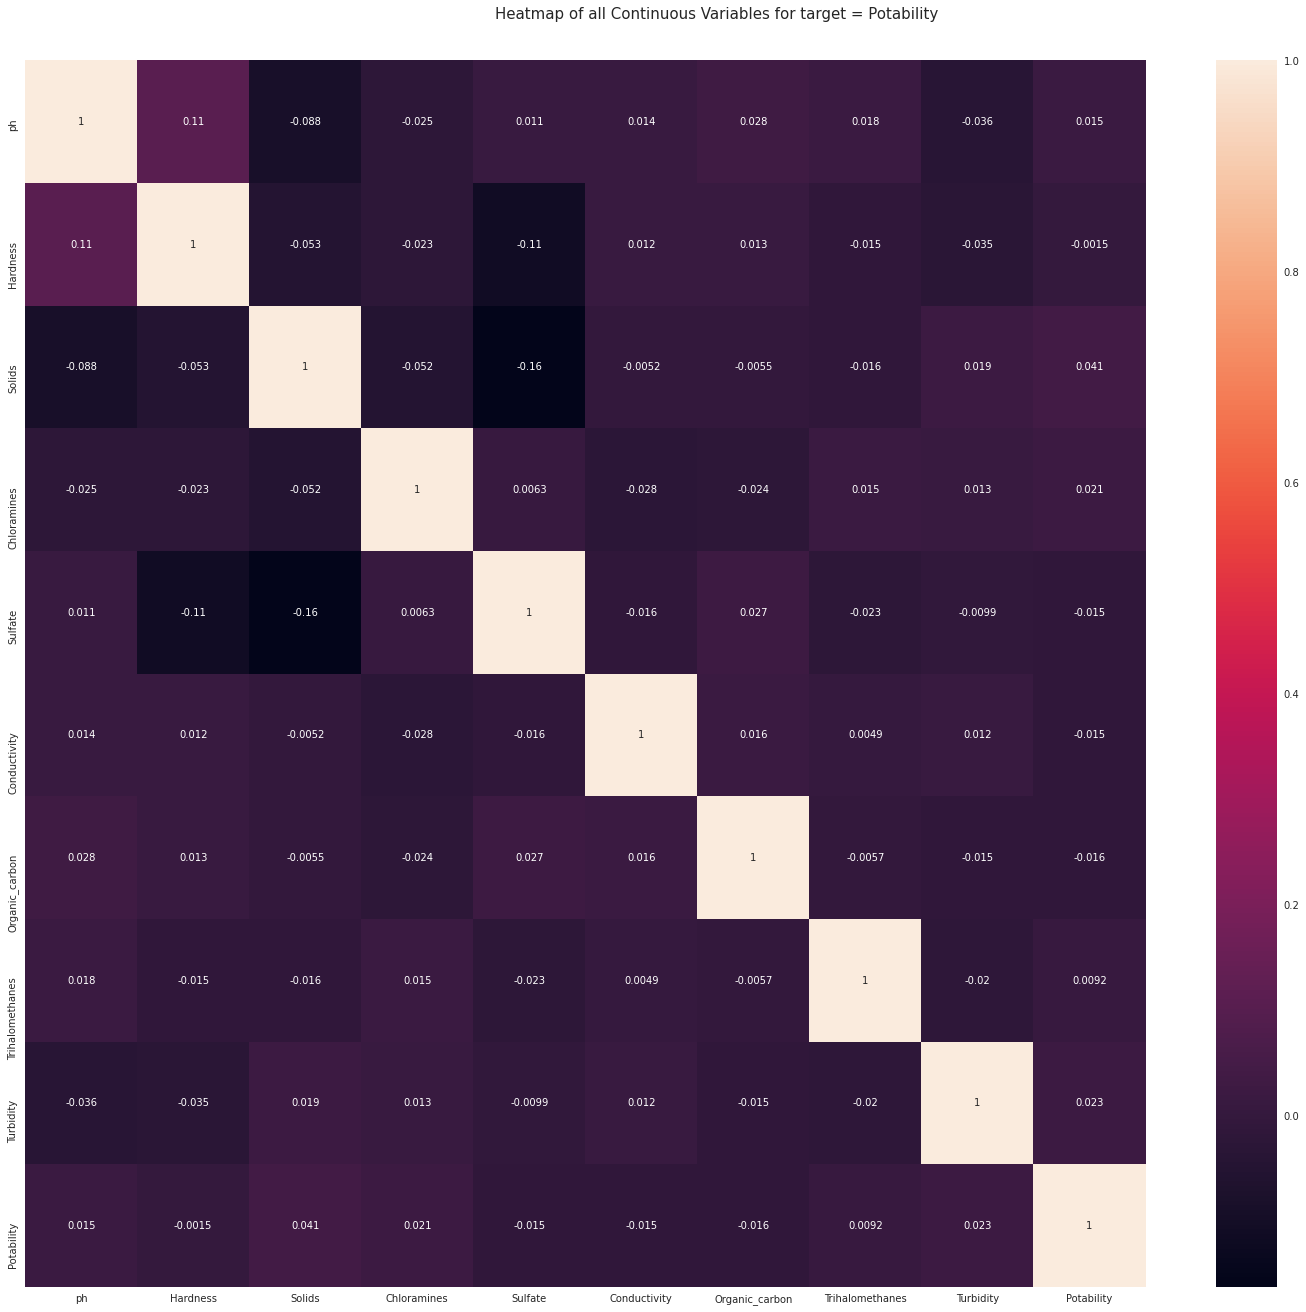

No categorical or boolean vars in data set. Hence no pivot plots...
No categorical or numeric vars in data set. Hence no bar charts.
Time to run AutoViz (in seconds) = 16.999

 ###################### VISUALIZATION Completed ########################


In [11]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
target='Potability'
df1 = AV.AutoViz(filename="",sep=',', depVar=target, dfte=df, header=0, verbose=1, 
                 lowess=False, chart_format='svg', max_rows_analyzed=150000, max_cols_analyzed=30)

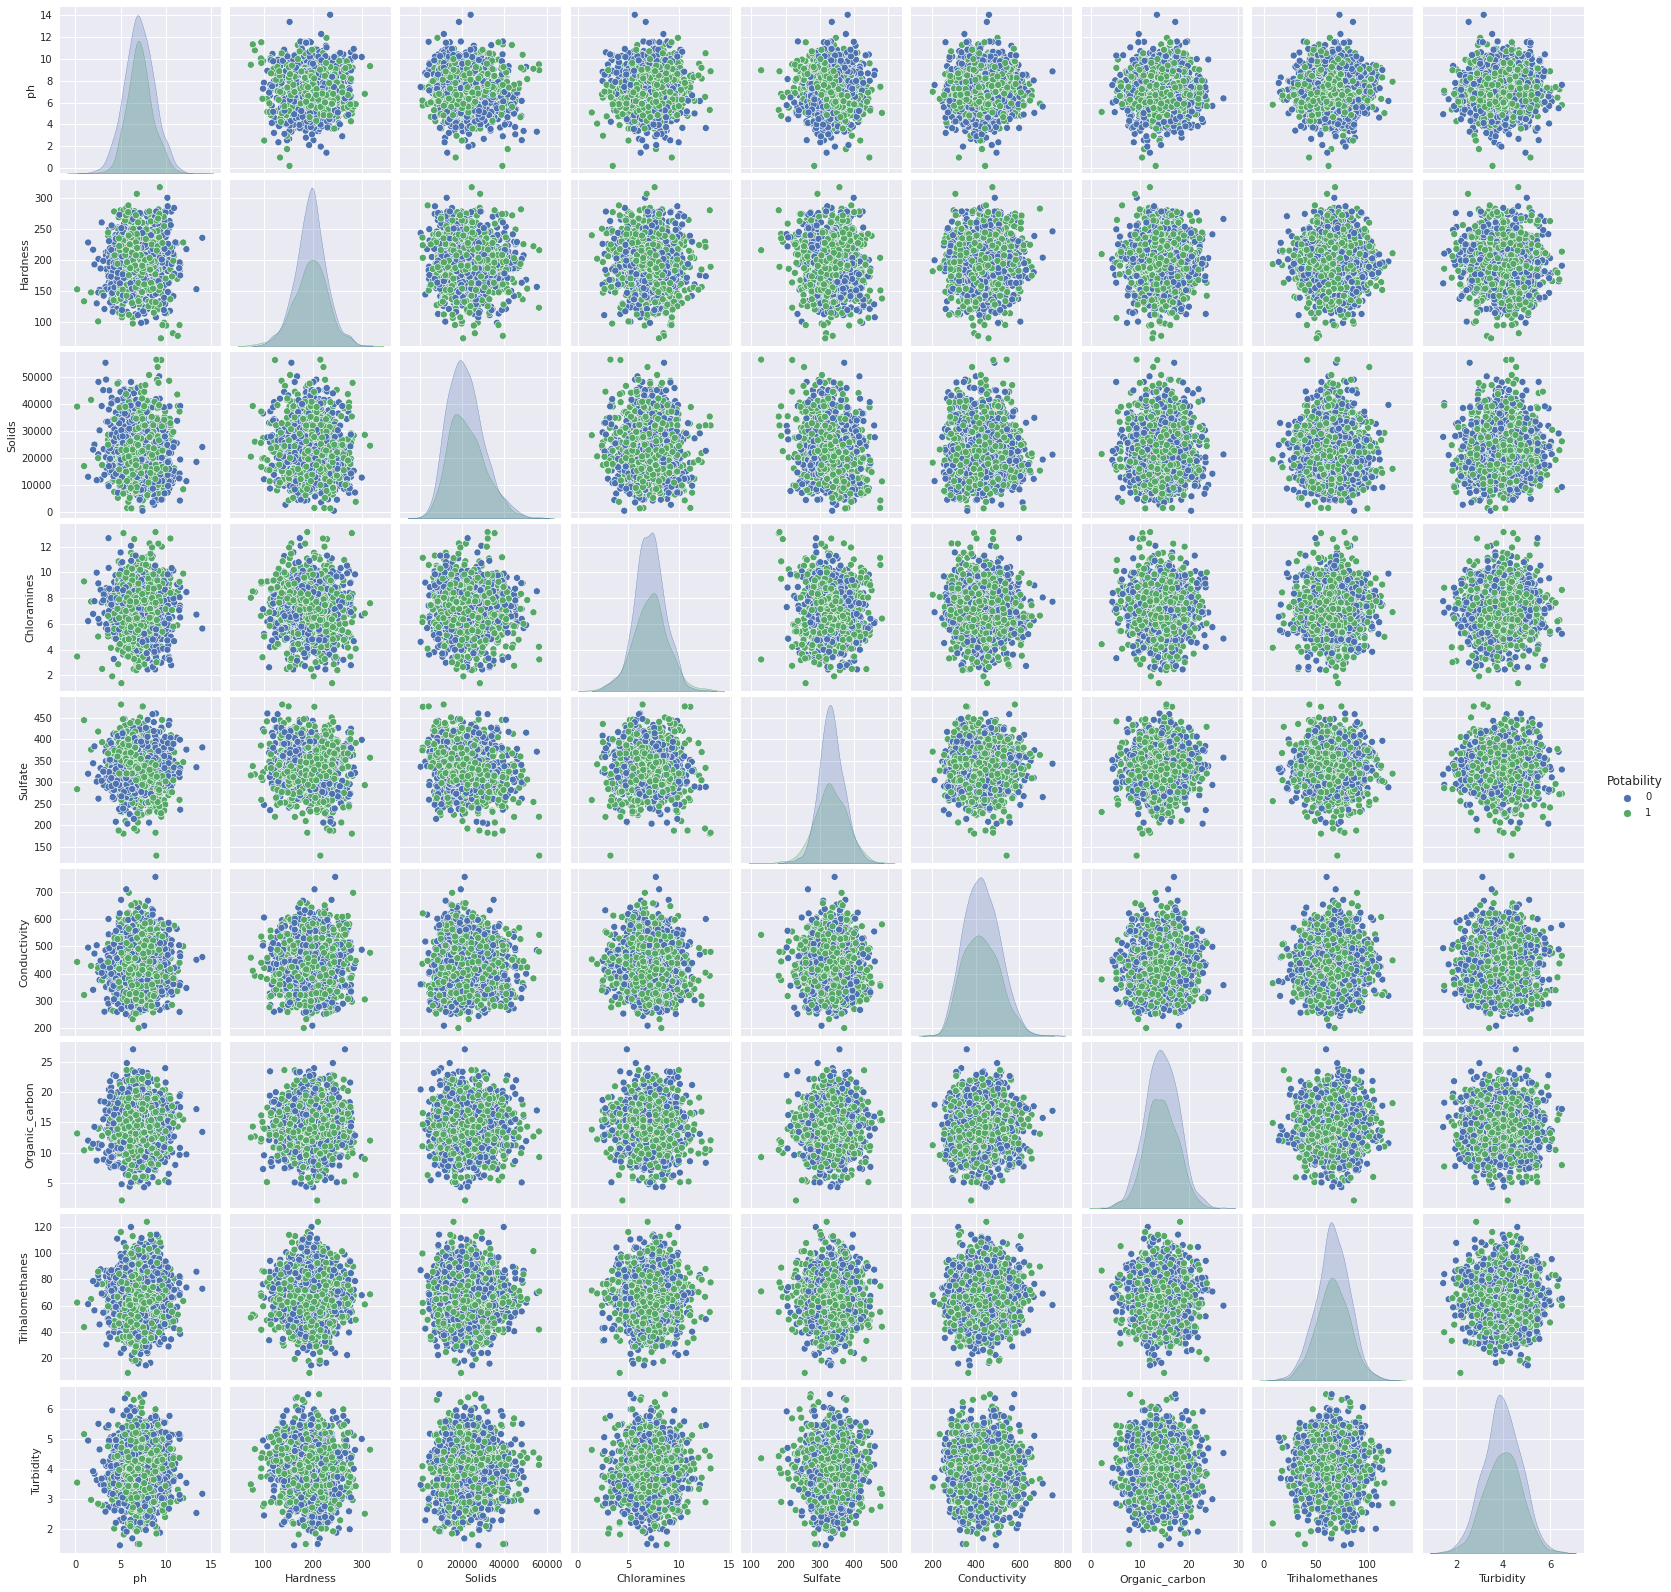

In [12]:
sns.pairplot(df,vars=['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity'],hue='Potability')

In [13]:
df.corr().abs()['Potability'].sort_values(ascending = False)

Potability         1.000000
Solids             0.040674
Turbidity          0.022682
Chloramines        0.020784
Organic_carbon     0.015567
Conductivity       0.015496
Sulfate            0.015303
ph                 0.014530
Trihalomethanes    0.009244
Hardness           0.001505
Name: Potability, dtype: float64

## Target balance

In [14]:
df.Potability.value_counts()

0    1200
1     811
Name: Potability, dtype: int64

## Split dataset Train 80% & Test 20% 

In [15]:
train, test = sklearn.model_selection.train_test_split(df,stratify=df["Potability"], train_size=.80, random_state=1)

<h1 style='background-color:#7FADC4 ; font-family:newtimeroman; font-size:200%; text-align:center; border-radius: 15px 50px;' > Feyn is a Python module for interacting with the QLattice </h1>

The QLattice is a machine learning technology that helps you search through an infinite list of potential mathematical models to solve your problem.

It's a quantum-inspired simulation where you make decisions when exploring the data, giving you a good understanding of the relationships in your data and closing the loop between scientific inquiry and data science.

<img src="https://steam.cryotank.net/wp-content/gallery/abzu/Abzu-02-HD-blurred.png" width="800px">

For more detailed  

##### [Here](https://docs.abzu.ai/docs/guides/primitives/using_primitives.html)

In [16]:
ql = feyn.connect_qlattice()

A new Community QLattice has been allocated for you. This temporary QLattice is available for personal/non-commercial use. By using this Community QLattice you agree to the terms and conditions which can be found at https://abzu.ai/privacy.


In [17]:
ql.reset(random_seed=0)

## Search for the best model

In [18]:
models = ql.auto_run(train, output_name="Potability", kind="classification", criterion="aic",threads=10,loss_function='binary_cross_entropy')

## Evaluating the models

In [19]:
best = models[0]

In [20]:
best.plot(train, test)

In [21]:
from feyn.plots.interactive import interactive_activation_flow

interactive_activation_flow(best, train)

interactive(children=(FloatSlider(value=305.0153211529986, description='Sulfate', max=481.0306423059972, min=1…

<function feyn.plots.interactive._graph_flow.interactive_activation_flow.<locals>.flow(**kwargs)>

<AxesSubplot:title={'center':'Actuals vs Predictions'}, xlabel='Actuals', ylabel='Predictions'>

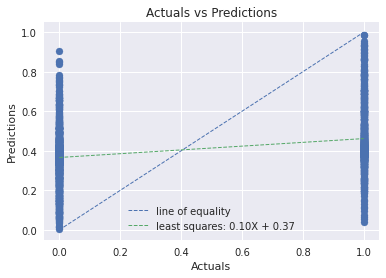

In [22]:
from feyn.plots import plot_regression

y_true = train['Potability']
y_pred = best.predict(train)

plot_regression(y_true, y_pred)

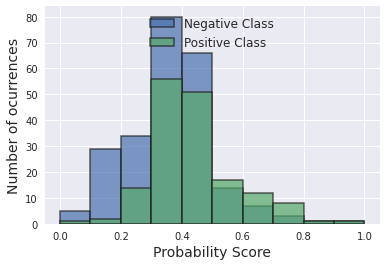

In [23]:
best.plot_probability_scores(test)

## Summary

In [24]:
from feyn.plots import plot_model_summary

plot_model_summary(best, train)

## Select the best Model

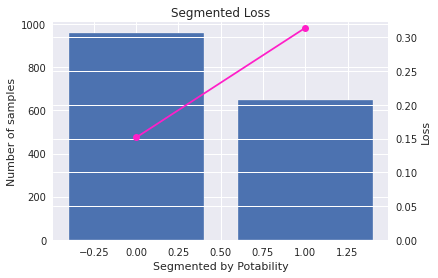

In [25]:
best = models[0]

best.plot_segmented_loss(
    data = train,
    by = None )


## Performance by plotting the ROC curve

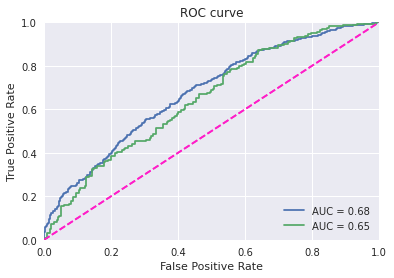

In [26]:
best.plot_roc_curve(train)
best.plot_roc_curve(test)

## Confusion matrix

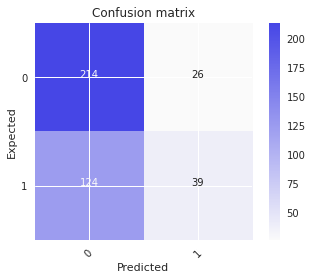

In [27]:
best.plot_confusion_matrix(test)

logreg(4.2*(0.32*ph - 2.3)*tanh(0.18*Chloramines - 0.0071*Sulfate + 1.1) - 0.41)

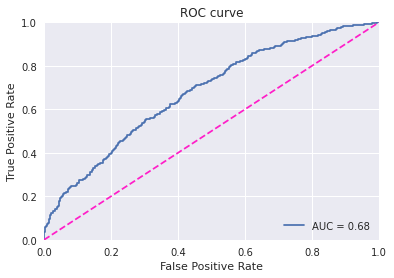

In [28]:
best = models[0]
best.plot(train, test)
best.plot_roc_curve(train)
best.sympify(2)

logreg(4.2*(0.32*ph - 2.3)*tanh(0.18*Chloramines - 0.0071*Sulfate + 1.1) - 0.41)

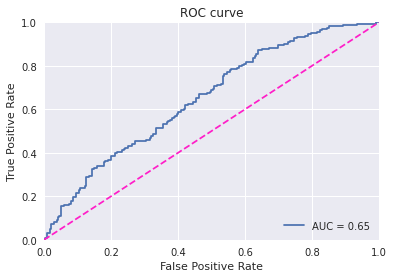

In [29]:
best = models[0]
best.plot(train, test)
best.plot_roc_curve(test)
best.sympify(2)